# 🩺 시나리오 기반 미션: AI 주치의, 심장 질환을 예측하라!

당신은 대형 병원 AI 개발팀의 주니어 엔지니어입니다. 병원에서는 **의료진의 판단을 돕는 ‘심장 질환 예측 보조 시스템’**을 개발하려 합니다.

현재 환자 진료 데이터를 바탕으로 다음을 수행해야 합니다.

---

## ✅ 실습 목표

- 다양한 전처리 전략을 통해 모델 성능을 향상
- SVM과 다른 모델을 앙상블하여 실제 의료 현장에 적합한 높은 정확도 확보
- 환자에게 “이 사람은 심장병일 가능성이 얼마나 높은가?”를 확률적으로 설명할 수 있는 모델 개발

---

## 📝 문제



### 🚩 Q2. 전처리 및 스케일링
- 범주형 피처에 대해 One-Hot Encoding을 하되, **‘의미 없는 분산이 낮은 카테고리’**는 제거하세요.
- 수치형 피처는 StandardScaler를 이용해 정규화하세요.



### 🚩 Q4. 앙상블 모델과 의료 현장 적용
- Hard Voting, Soft Voting을 구성하고 성능을 비교하세요.
- Soft Voting의 확률 결과를 활용해 "이 환자의 심장병 확률은 X%입니다" 라고 설명하는 함수를 만드세요.

---

## 🎯 추가 과제: AI 보조 설명 기능 만들기

의사는 단순한 예측보다 이유를 알고 싶어합니다.

- SHAP 또는 Permutation Importance를 활용하여 환자 A에게 ‘심장병’ 판정이 내려진 이유를 설명하세요.
- 가장 영향력 있는 피처 3개를 뽑아 자연어로 설명하세요.

예시:
> 환자 A는 심박수가 매우 높고, 운동 중 협심증이 있으며, 콜레스테롤 수치가 높기 때문에 심장 질환이 의심됩니다.

---

## 🛠 기술 스택

- pandas, matplotlib, seaborn
- scikit-learn
- shap (선택 과제)

---

## 📁 참고 링크

- [Heart Disease UCI Kaggle 링크](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)
- [의학적 변수 설명 자료 (공식 UCI)](https://archive.ics.uci.edu/ml/datasets/heart+Disease)


In [21]:
# 데이터 로드

import pandas as pd
import os


os.chdir("../참고자료")
df = pd.read_csv("heart_cleveland_upload.csv")
df.head(5)  # 데이터의 처음 5개 행을 출력합니다.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### 🚩 Q1. 데이터 탐색 및 의학적 인사이트 추출
- 심장 질환 유무(target)에 따라 심박수(thalach), ST depression(oldpeak), 통증 유형(cp) 등의 특징이 어떻게 다른지 시각화하세요.
- 가장 유의미한 변수 3개를 의학적 설명과 함께 선택해보세요.

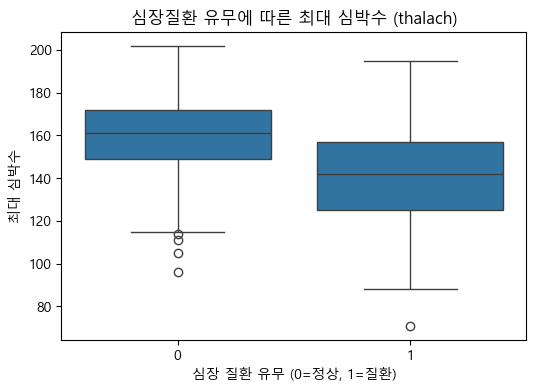

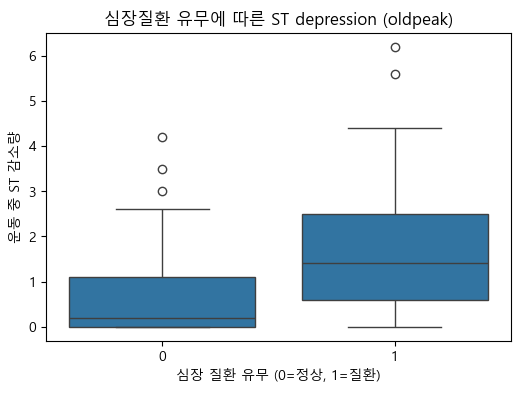

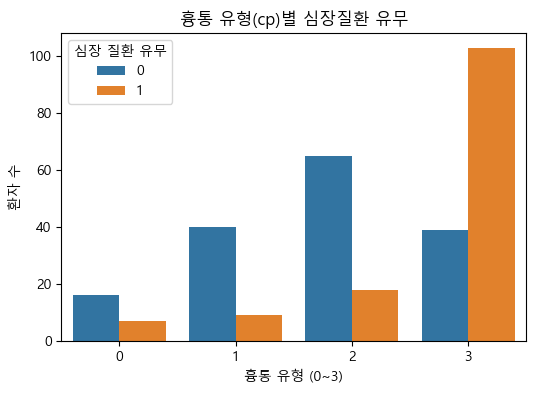

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시스템에 설치된 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='un Gothic')  # '맑은 고딕' 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지지

# 1. 최대 심박수 (thalach)
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='thalach', data=df)
plt.title("심장질환 유무에 따른 최대 심박수 (thalach)")
plt.xlabel("심장 질환 유무 (0=정상, 1=질환)")
plt.ylabel("최대 심박수")
plt.show()

# 2. ST depression (oldpeak)
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='oldpeak', data=df)
plt.title("심장질환 유무에 따른 ST depression (oldpeak)")
plt.xlabel("심장 질환 유무 (0=정상, 1=질환)")
plt.ylabel("운동 중 ST 감소량")
plt.show()

# 3. 흉통 유형 (cp: chest pain type)
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='condition', data=df)
plt.title("흉통 유형(cp)별 심장질환 유무")
plt.xlabel("흉통 유형 (0~3)")
plt.ylabel("환자 수")
plt.legend(title="심장 질환 유무")
plt.show()

thalach: 질환 여부에 따라 유의미한 차이를 보이는 최대 심박수

oldpeak: ST depression은 허혈 상태를 반영하며, 심장 질환의 직접적 지표

cp: 흉통 유형은 심장병 여부의 주요 신호 (특히 cp=0은 위험군)

In [23]:
# 범주형 피처 추출
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 각 피처별 분산(값의 다양성) 확인
for col in cat_features:
    print(f"{col} 고유값 비율:\n{df[col].value_counts(normalize=True)}\n")

sex 고유값 비율:
sex
1    0.676768
0    0.323232
Name: proportion, dtype: float64

cp 고유값 비율:
cp
3    0.478114
2    0.279461
1    0.164983
0    0.077441
Name: proportion, dtype: float64

fbs 고유값 비율:
fbs
0    0.855219
1    0.144781
Name: proportion, dtype: float64

restecg 고유값 비율:
restecg
0    0.494949
2    0.491582
1    0.013468
Name: proportion, dtype: float64

exang 고유값 비율:
exang
0    0.673401
1    0.326599
Name: proportion, dtype: float64

slope 고유값 비율:
slope
0    0.468013
1    0.461279
2    0.070707
Name: proportion, dtype: float64

ca 고유값 비율:
ca
0    0.585859
1    0.218855
2    0.127946
3    0.067340
Name: proportion, dtype: float64

thal 고유값 비율:
thal
0    0.552189
2    0.387205
1    0.060606
Name: proportion, dtype: float64



In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 제거할 컬럼
df = df.drop(columns=['fbs'])

# 2. 범주형 컬럼 (fbs 제외)
cat_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 3. 수치형 컬럼
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 4. One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# 5. 수치형 정규화
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# 최종 결과 확인
print(df_encoded.head())


        age  trestbps      chol   thalach   oldpeak  condition  sex_1   cp_1  \
0  1.600302  1.596266 -0.257179 -0.812095 -0.820813          0   True  False   
1  1.600302  0.468418 -0.160859  0.061157  0.639470          0  False  False   
2  1.268242  1.032342 -0.411292 -1.554358  1.326662          0  False  False   
3  1.157555  0.355633  0.667499  1.065396  0.295874          1   True  False   
4  1.046868 -1.223355 -0.700254 -0.244481  0.639470          0   True  False   

    cp_2   cp_3  restecg_1  restecg_2  exang_1  slope_1  slope_2   ca_1  \
0  False  False      False       True    False     True    False   True   
1  False  False      False      False    False    False    False  False   
2  False  False      False      False    False    False     True  False   
3  False  False      False       True    False     True    False   True   
4  False  False      False       True     True     True    False  False   

    ca_2   ca_3  thal_1  thal_2  
0  False  False   False   False  


### 🚩 Q3. 모델별 예측 비교
- SVC(probability=True), RandomForestClassifier, LogisticRegression을 학습시키고, 테스트 정확도, precision, recall을 비교하세요.
- 환자의 진단이 False Positive가 되었을 때, 어떤 모델이 가장 "안전한" 판단을 내리는지 해석하세요.

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import pandas as pd

# 데이터 분리
X = df_encoded.drop(columns='condition')
y = df_encoded['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 모델 정의
models = {
    "SVC": SVC(probability=True, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장 리스트
results = []

In [26]:
# 평가 함수
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision_1": round(prec_1, 4),
        "Recall_1": round(rec_1, 4),
        "F1_1": round(f1_1, 4)
    })

# 결과 출력
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='F1_1', ascending=False).reset_index(drop=True)

print("정밀도 + 재현율 + F1 종합 평가 결과:")
print(df_results)

# 가장 신중하고 효과적인 모델 자동 판단
best_model = df_results.iloc[0]
print(f"\n✅ 의료 현장에 가장 적합한 모델은: {best_model['Model']}")
print(f"→ Precision(1): {best_model['Precision_1']} | Recall(1): {best_model['Recall_1']} | F1(1): {best_model['F1_1']}")

정밀도 + 재현율 + F1 종합 평가 결과:
                Model  Accuracy  Precision_1  Recall_1    F1_1
0  LogisticRegression    0.9167       1.0000    0.8214  0.9020
1                 SVC    0.8667       1.0000    0.7143  0.8333
2        RandomForest    0.8167       0.8696    0.7143  0.7843

✅ 의료 현장에 가장 적합한 모델은: LogisticRegression
→ Precision(1): 1.0 | Recall(1): 0.8214 | F1(1): 0.902


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분리
X = df_encoded.drop(columns='condition')
y = df_encoded['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 개별 모델 정의
svc = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)


In [28]:
# Hard Voting: 다수결
voting_hard = VotingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('lr', lr)],
    voting='hard'
)

# Soft Voting: 확률 평균
voting_soft = VotingClassifier(
    estimators=[('svc', svc), ('rf', rf), ('lr', lr)],
    voting='soft'
)


In [29]:
# 학습
voting_hard.fit(X_train, y_train)
voting_soft.fit(X_train, y_train)

# 평가 함수
def print_report(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔎 {name} 결과")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))

print_report(voting_hard, "Hard Voting")
print_report(voting_soft, "Soft Voting")



🔎 Hard Voting 결과
Accuracy: 0.8667
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889        32
           1     1.0000    0.7143    0.8333        28

    accuracy                         0.8667        60
   macro avg     0.9000    0.8571    0.8611        60
weighted avg     0.8933    0.8667    0.8630        60


🔎 Soft Voting 결과
Accuracy: 0.8667
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889        32
           1     1.0000    0.7143    0.8333        28

    accuracy                         0.8667        60
   macro avg     0.9000    0.8571    0.8611        60
weighted avg     0.8933    0.8667    0.8630        60



In [ ]:
def explain_patient_risk(model, patient_row):
    prob = model.predict_proba(patient_row)[0][1]  # 클래스 1(심장질환) 확률
    return f"🩺 이 환자의 심장병 확률은 약 {prob * 100:.1f}%입니다."

rank = []

# 사용 예시: 전체환자
for i in range(len(X_test)):
    patient_row = X_test.iloc[[i]]  # 특정 환자 데이터 (DataFrame 형태)
    # insert 
    rank.append(explain_patient_risk(voting_soft, patient_row))

# 사용 예시: 특정 환자 (예: 0번째 환자)
patient_row = X_test.iloc[[0]]  # 특정 환자 데이터 (DataFrame 형태)
print(explain_patient_risk(voting_soft, patient_row))




🩺 이 환자의 심장병 확률은 약 17.5%입니다.
